## Lifecycle Of A Data Science Project
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

# EDA

### 1. Missing Values

In [6]:
df.isnull().sum().sum()

6965

In [7]:
# checking for precentage of the missing values in each column

missing_features = [features for features in df.columns if df[features].isnull().sum()>1]

for f in missing_features:
    print(f,"  ",  np.round(df[f].isnull().mean()*100, 2), "%")

LotFrontage    17.74 %
Alley    93.77 %
MasVnrType    0.55 %
MasVnrArea    0.55 %
BsmtQual    2.53 %
BsmtCond    2.53 %
BsmtExposure    2.6 %
BsmtFinType1    2.53 %
BsmtFinType2    2.6 %
FireplaceQu    47.26 %
GarageType    5.55 %
GarageYrBlt    5.55 %
GarageFinish    5.55 %
GarageQual    5.55 %
GarageCond    5.55 %
PoolQC    99.52 %
Fence    80.75 %
MiscFeature    96.3 %


We can probably ignore/drop missing value percentage more than 60-70%. But since they are many missing values, we need to find the relationship between missing values and Sales Price. We'll do this plotting diagrams of missing values and SalesPrice

#### Checking relationship between missing values and Y

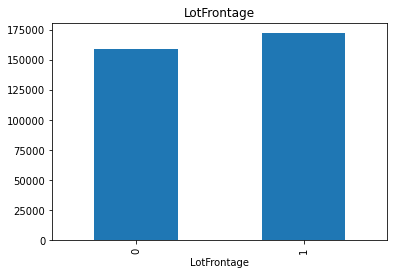

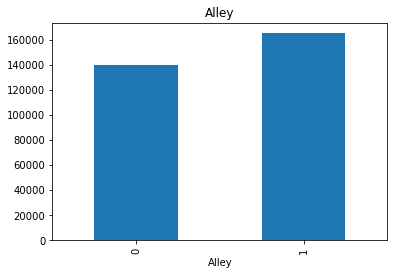

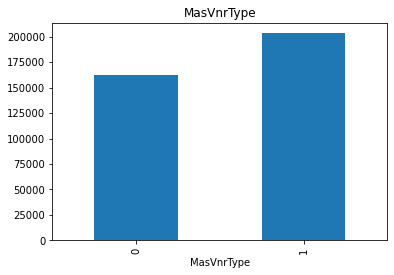

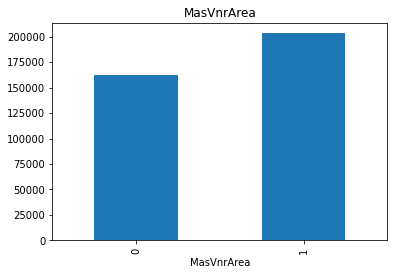

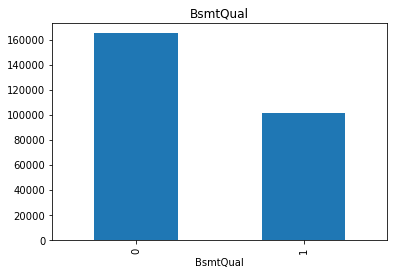

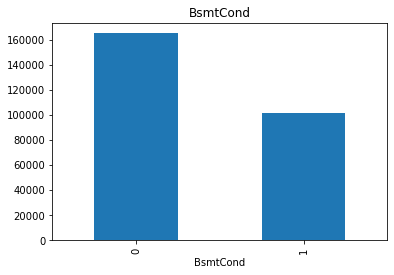

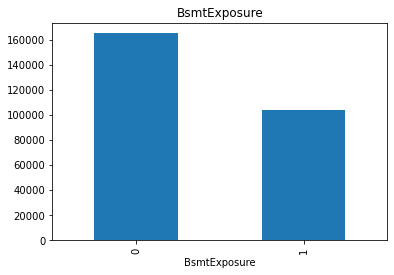

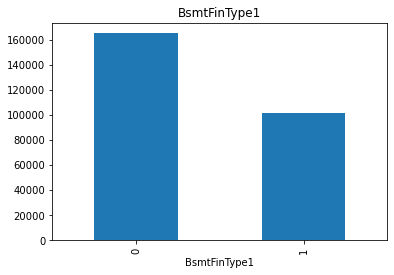

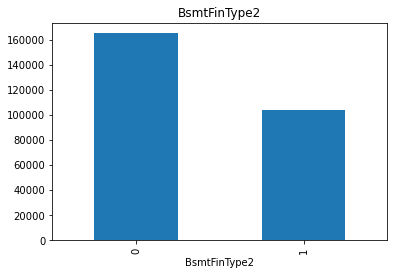

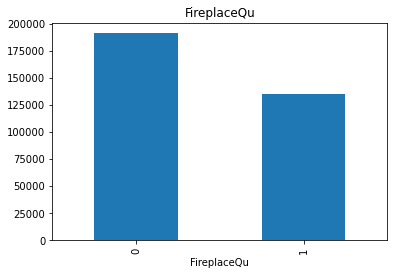

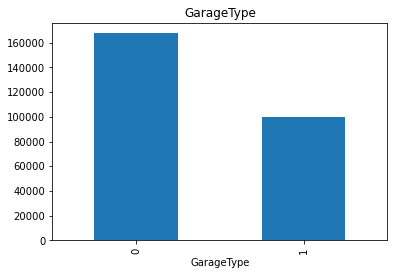

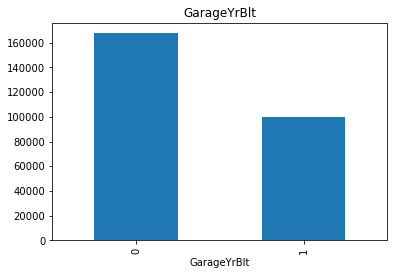

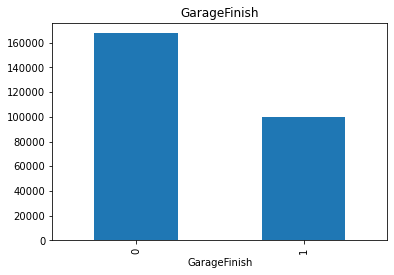

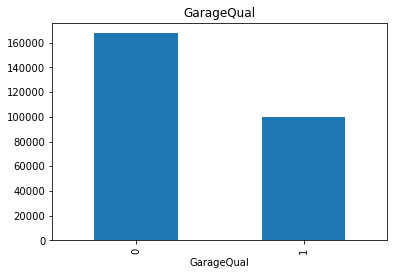

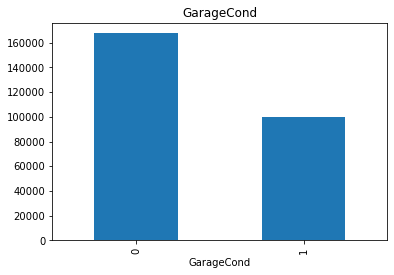

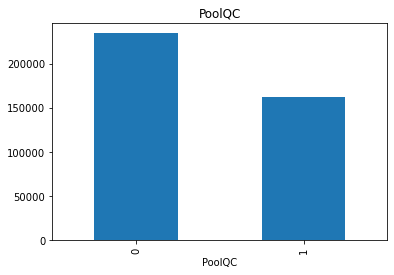

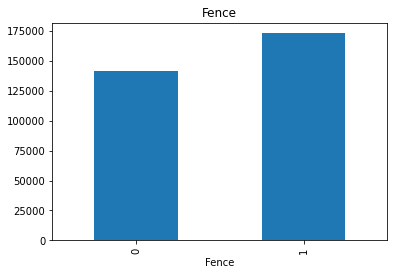

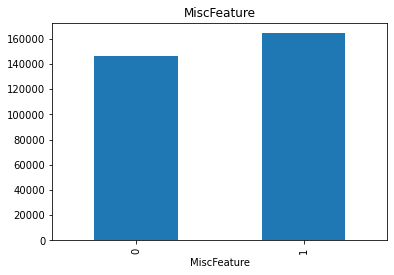

In [8]:
# we will plot the effect of missing value on the Sales price

# for every feature : 
# 1.converting missing values to 1 and non-missing to 0
# 2.calculate the average SalePrice for missing/non-missing values of the particular feature

for feature in missing_features:
    data = df.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here as we can see that the missing values affect the SalesPrice in many features. Hence we cannot drop the missing values. We'll fill the missing values in the feature engineering section

## 2. Numerical variables 

In [9]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
print(len(numerical_features))
df[numerical_features].head()

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal DateTime variables

In [10]:
datetime = [feature for feature in numerical_features if "Yr" in feature or "Year" in feature]
datetime

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
df[datetime]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


#### Analysing temporal features' relationship with SalePrice

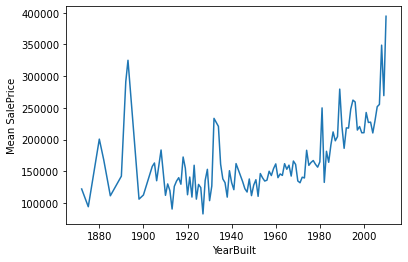

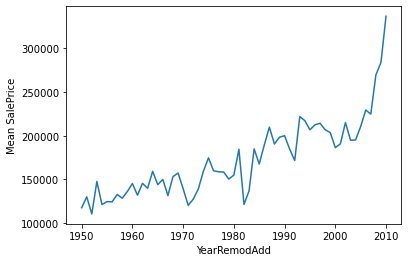

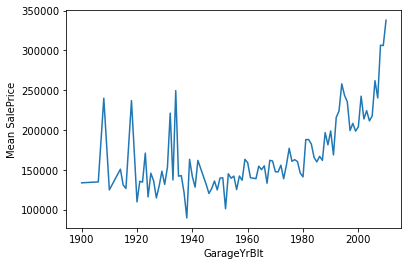

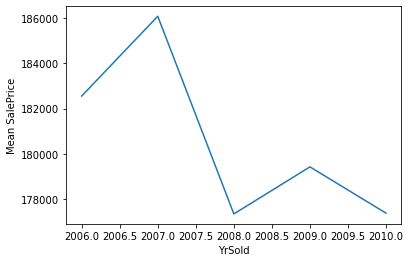

In [12]:
for feature in datetime:
    df.groupby(feature)['SalePrice'].mean().plot()
    plt.xlabel(feature)
    plt.ylabel('Mean SalePrice')
    plt.show()

As we can see that the value of SalePrice decreases as the YearSold increases. This usually should not be the case since the price of the house must increase if it is sold late. Hence we will see the difference between the year built and the year sold for the house. This will tell us the relationship between the SalePrice and the age of the house and not just the year it was sold

<AxesSubplot:ylabel='SalePrice'>

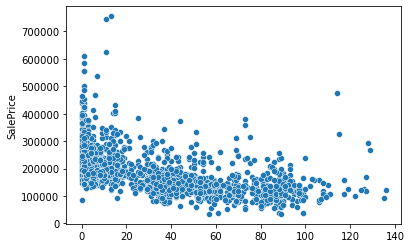

In [13]:
sns.scatterplot(df['YrSold'] - df['YearBuilt'], df['SalePrice'])

We can do this for all the year variables to see the relationship between SalePrice and the age of the function performed on the house eg. how many years since it has been remodified, garage has been built etc.

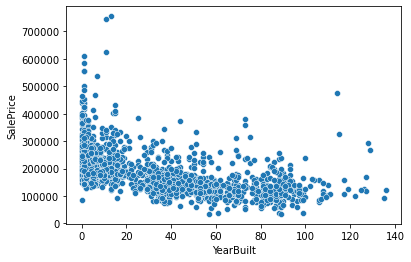

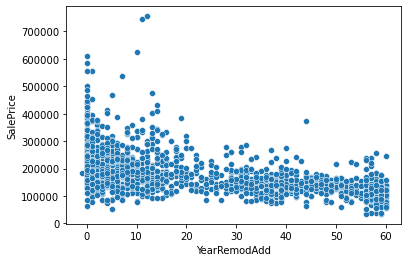

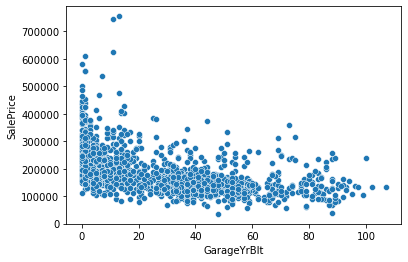

In [14]:
for feature in datetime:
    if feature != 'YrSold':
        sns.scatterplot(df['YrSold'] - df[feature], df['SalePrice'])
        plt.xlabel(feature)
        plt.show()
    

Now we can clearly see the realtionship between age of the house, modification done on it, etc. and the SalePrice

### Discrete Variables

In [15]:
# we consider 25 unique values inside a feature as the threshold value to be discrete feature
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in datetime + ['Id']]
len(discrete_feature)

17

In [16]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

#### Plotting the distribution of discrete variables

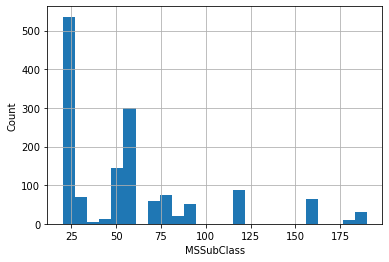

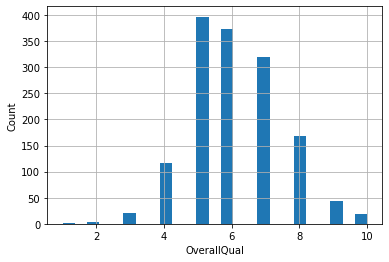

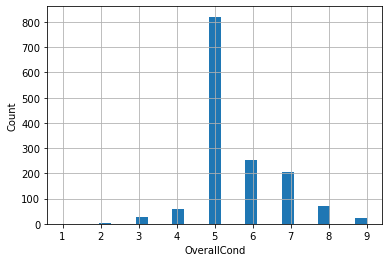

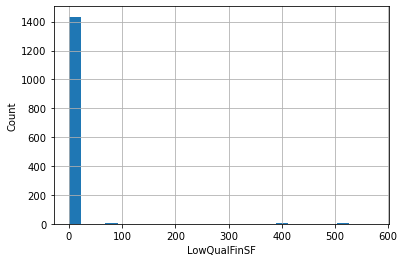

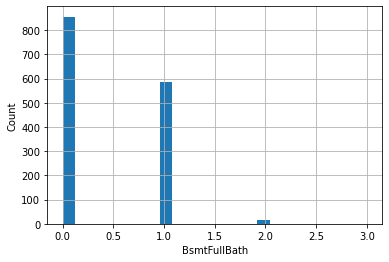

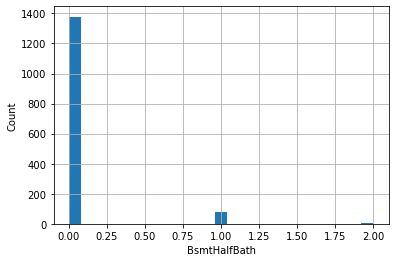

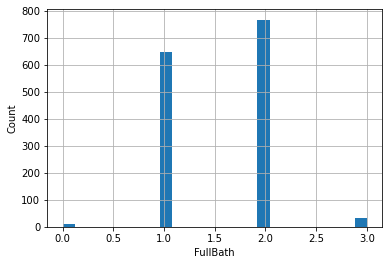

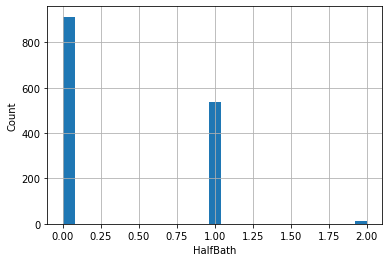

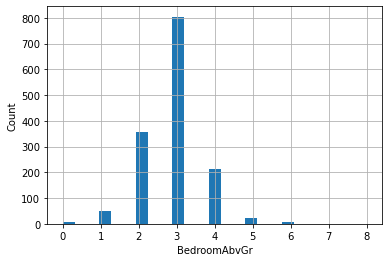

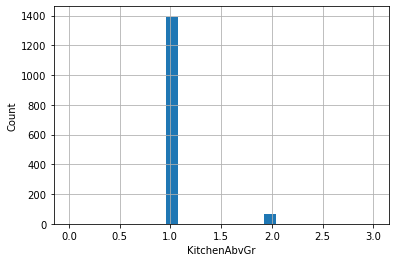

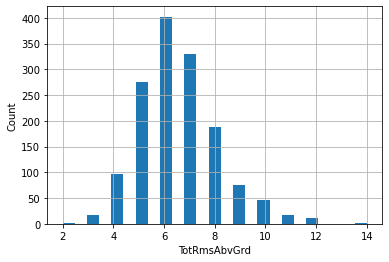

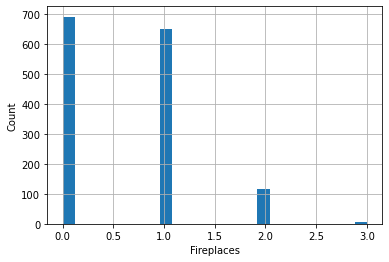

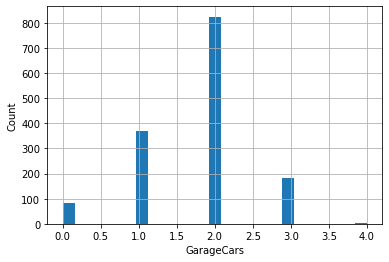

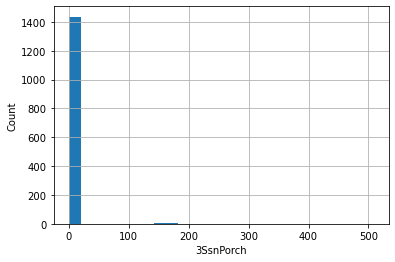

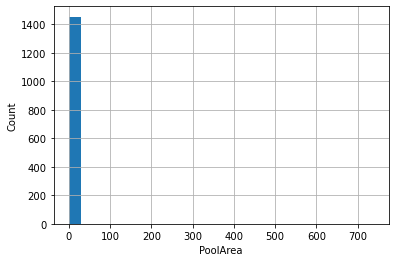

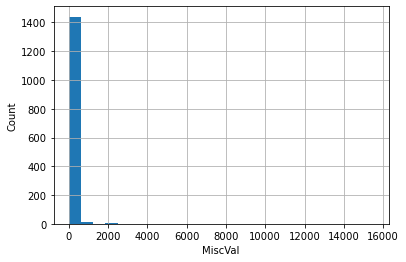

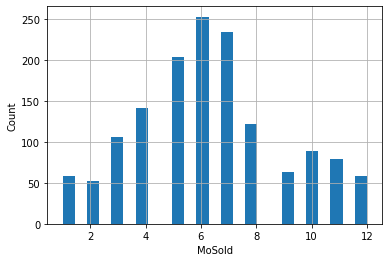

In [17]:
for feature in discrete_feature:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

#### Finding the relatioship between discrete features and the SalePrice

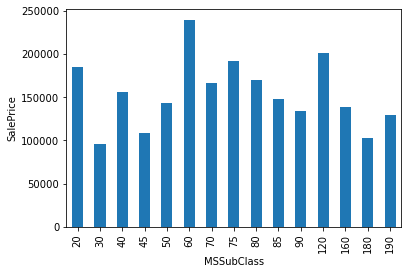

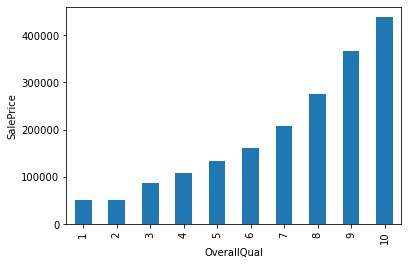

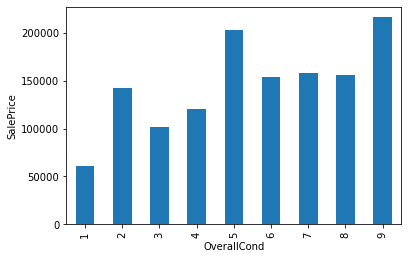

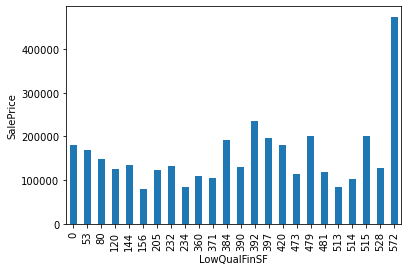

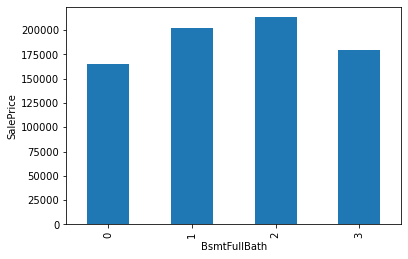

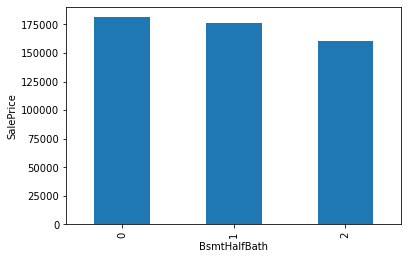

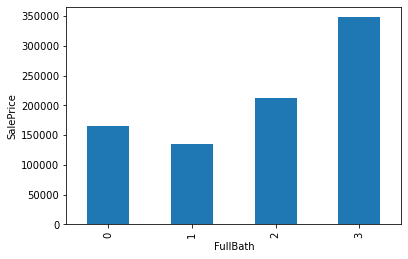

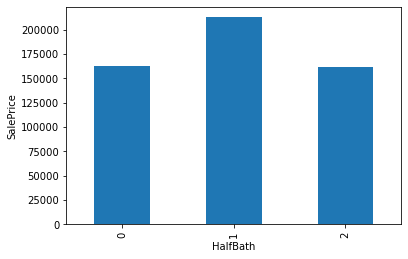

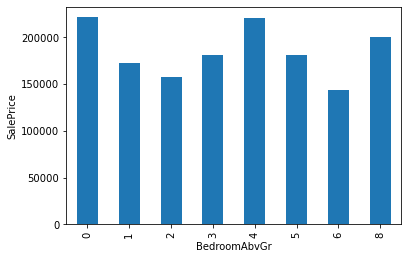

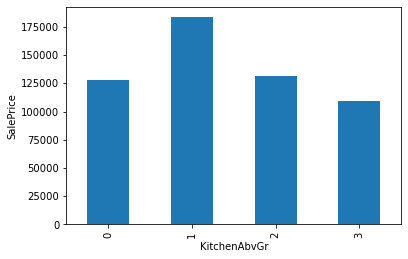

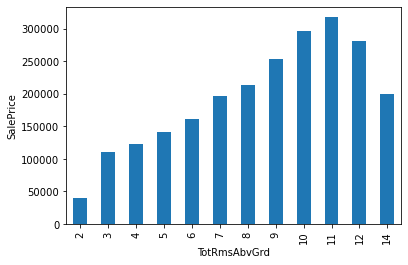

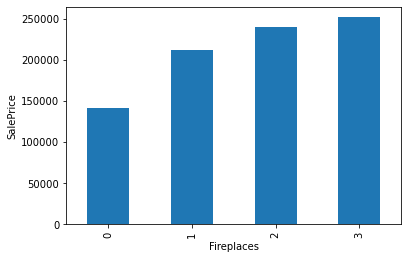

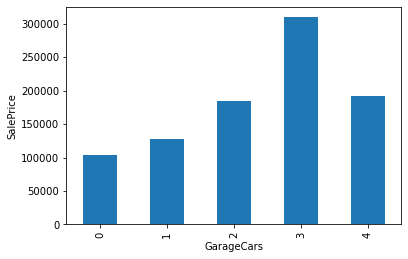

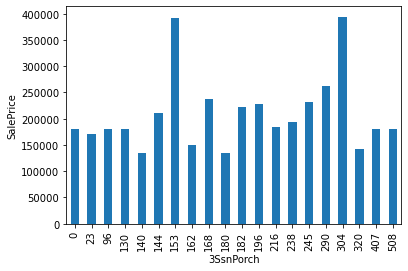

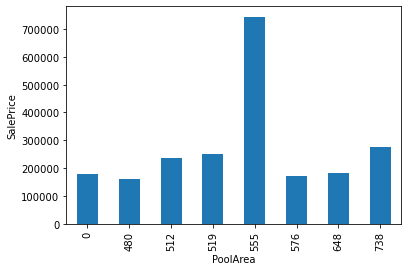

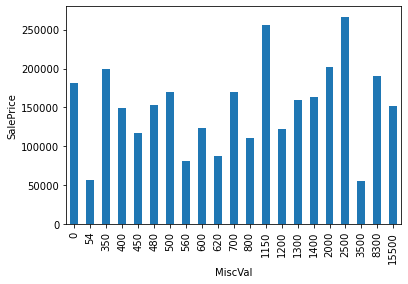

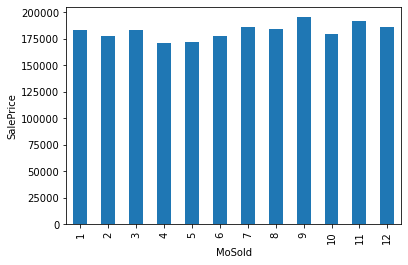

In [18]:
for feature in discrete_feature:
    df.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

There is a relationship between variable number and SalePrice

### Continuous Variables

In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+datetime+['Id']]
len(continuous_feature)

16

In [20]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

#### Plotting the disrtibution of continuous features

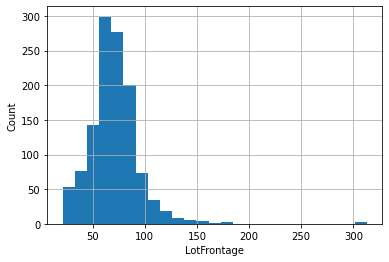

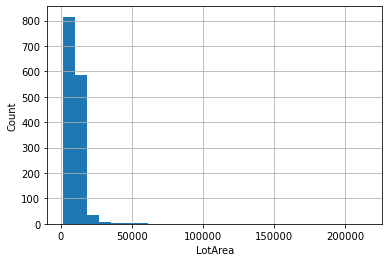

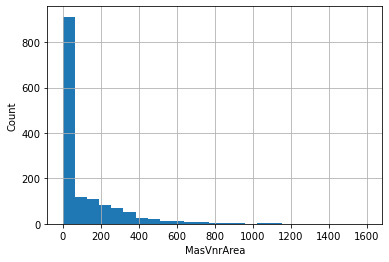

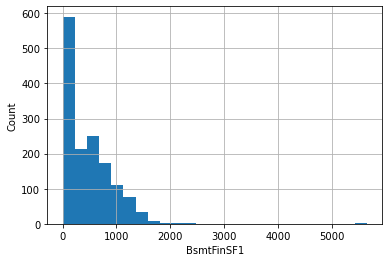

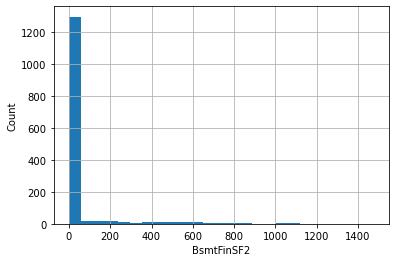

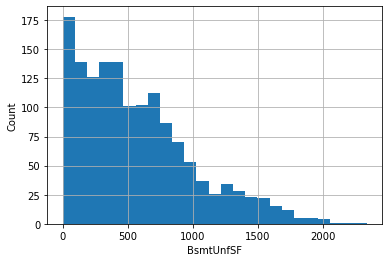

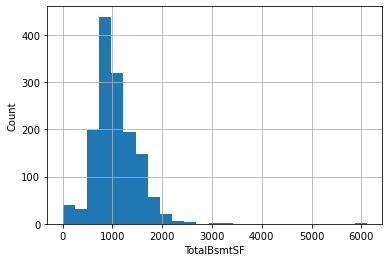

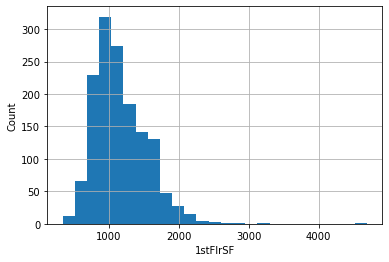

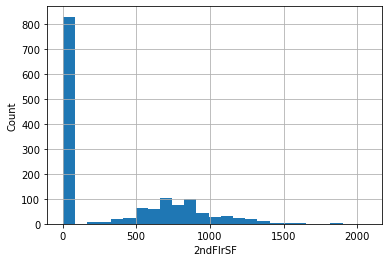

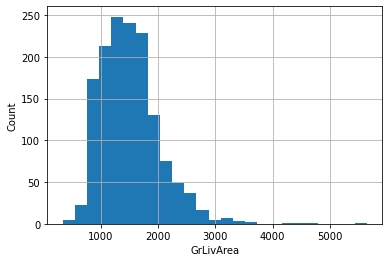

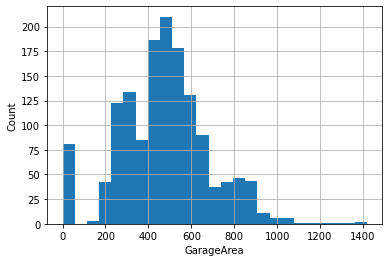

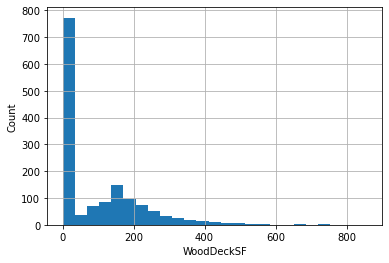

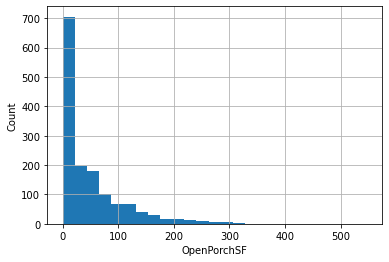

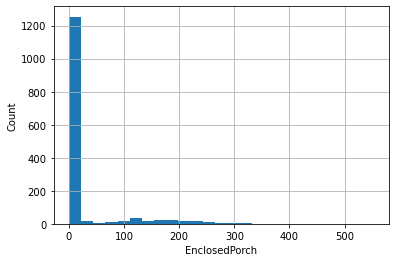

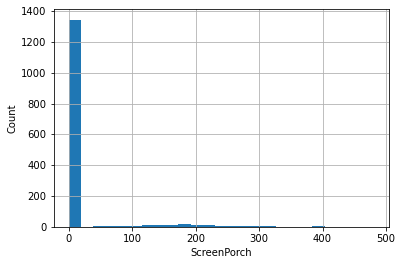

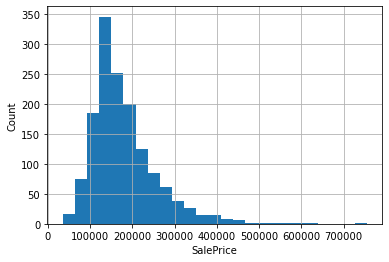

In [21]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()



As we can see that the distribution of the continuous variables is mostly right(positive) skewed, we might apply log transformation on the data inorder to make it normal.

### Outliers

#### Printing the number of outliers in the continuous variables
This is done by using the ZScore of the features. If the ZScore is beyond 3 standard deviations, we consider the point as an outlier

In [22]:
outliers = []
def detect_outliers_zscore(data):
    thresh = 3
    mean = np.mean(df[feature])
    std = np.std(df[feature])
#     print(mean, std)
    
    for i in df[feature]:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thresh):
            outliers.append(i)
    return outliers

for feature in continuous_feature:
    print(feature,len(detect_outliers_zscore(feature)))

LotFrontage 12
LotArea 25
MasVnrArea 57
BsmtFinSF1 63
BsmtFinSF2 113
BsmtUnfSF 124
TotalBsmtSF 134
1stFlrSF 146
2ndFlrSF 150
GrLivArea 166
GarageArea 173
WoodDeckSF 195
OpenPorchSF 222
EnclosedPorch 273
ScreenPorch 328
SalePrice 350


#### checking the same using a boxplot

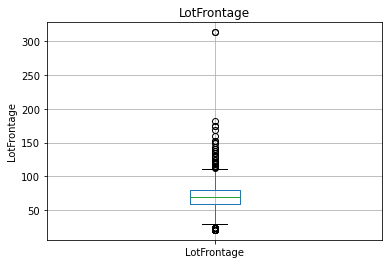

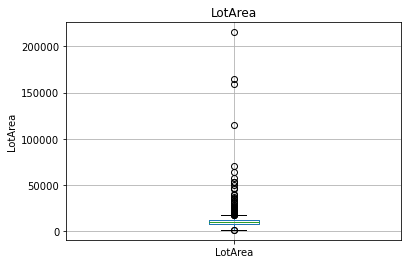

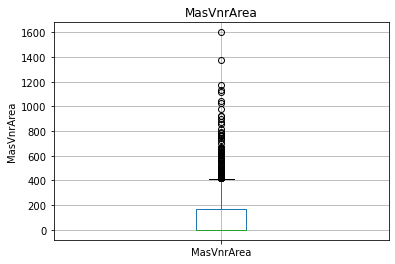

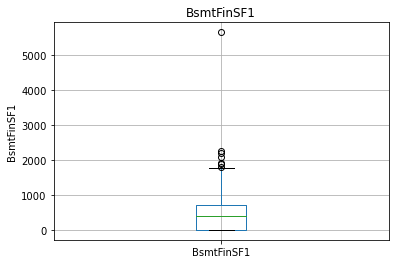

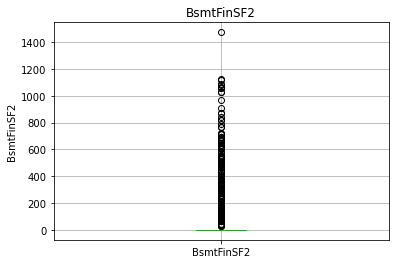

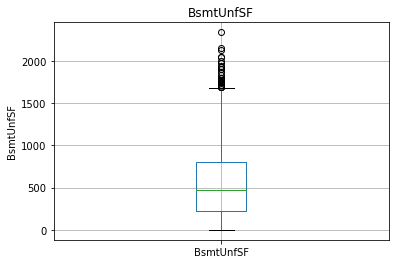

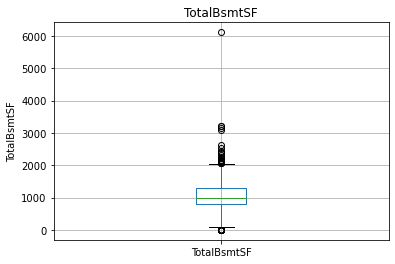

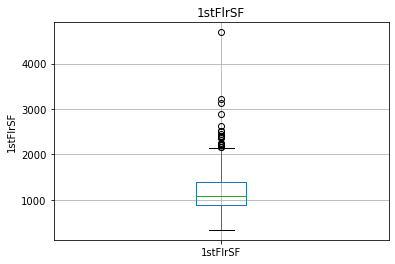

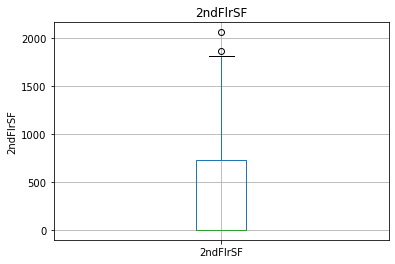

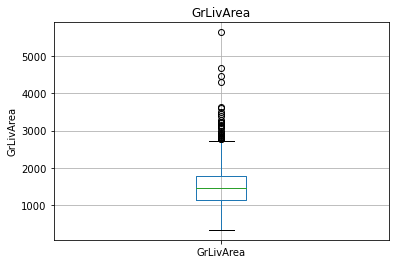

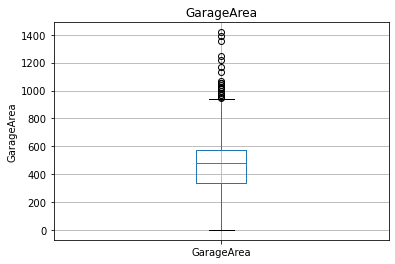

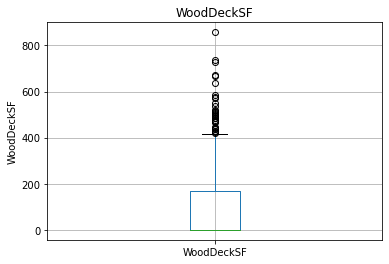

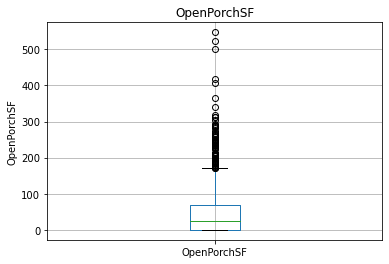

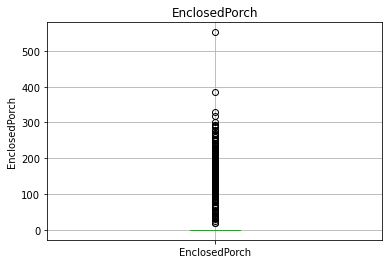

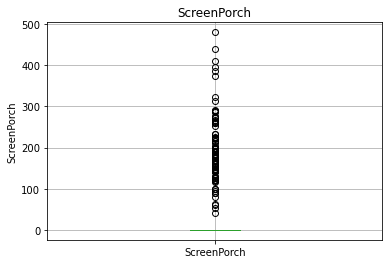

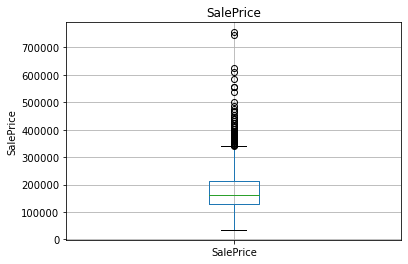

In [23]:
for feature in continuous_feature:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

As we can see there are many outliers in the distribution of the datasets. We need to handle them as well

We can perform a log normal distribution on the data inorder to remove the skewness and then the outliers will be reduced. They can be further removed in feature engineering

## 2. Categorical variables 

In [24]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]
print(len(categorical_feature))

43


In [25]:
df[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Checking the cardinality of each categorical feature

In [26]:
for feature in categorical_feature:
    print(feature, len(df[feature].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


As we can see that the cardinality is pretty high in some of the categorical features. We have to find another way to handle these features. For the rest of the features, we can just perform the one-hot encoding

#### Plotting the relation between categorical features and SalePrice

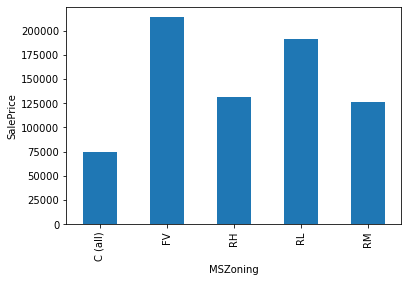

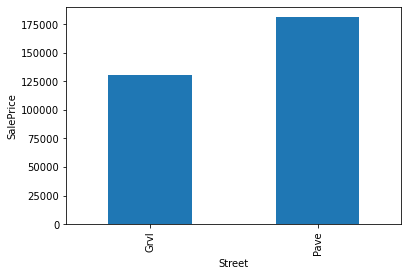

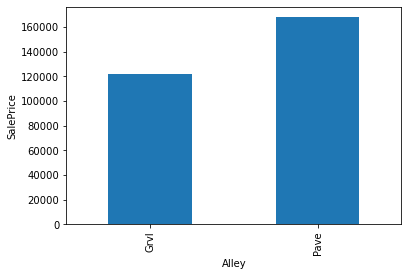

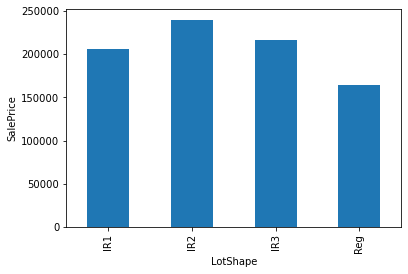

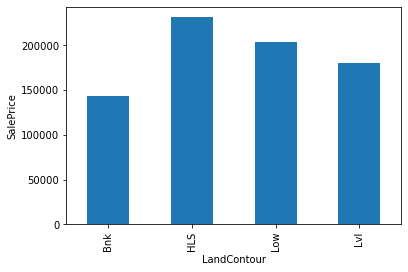

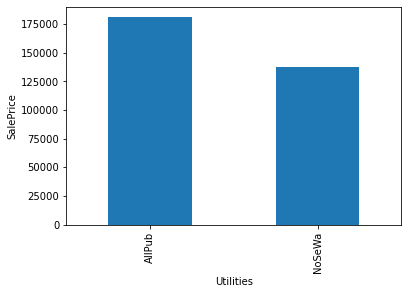

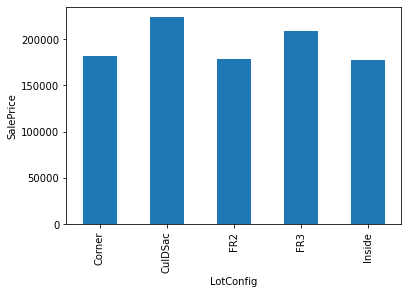

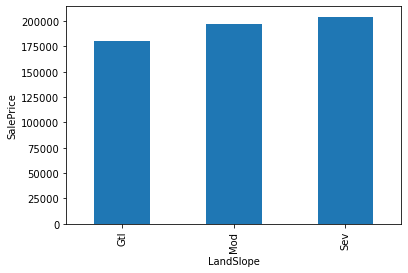

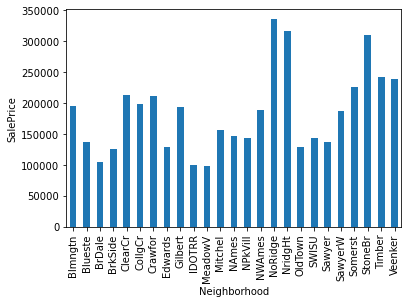

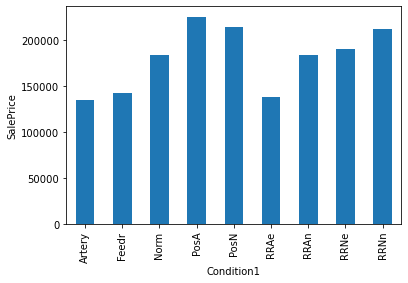

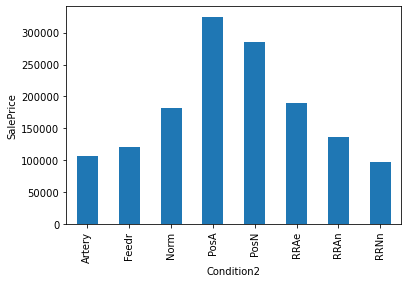

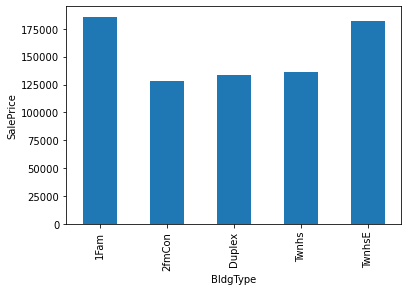

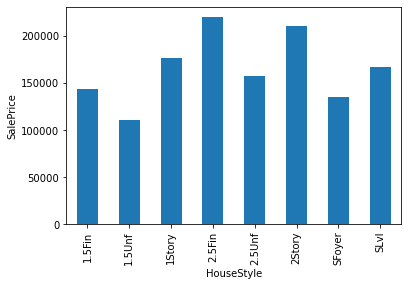

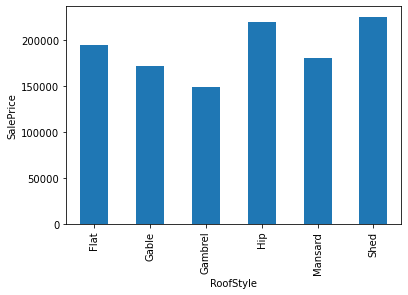

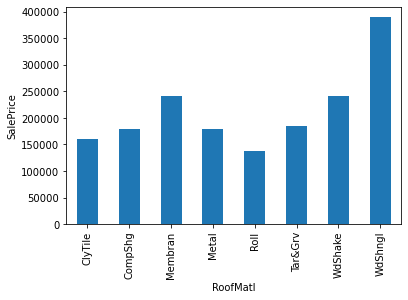

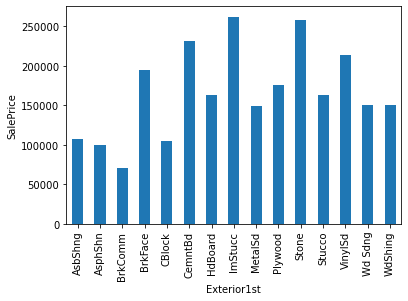

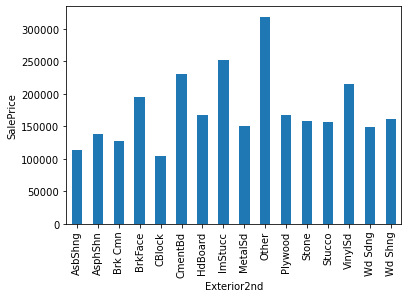

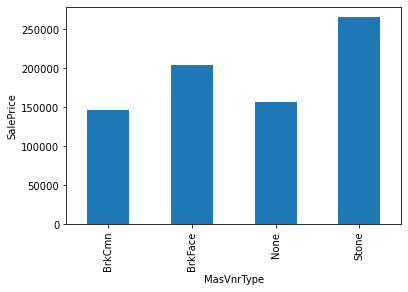

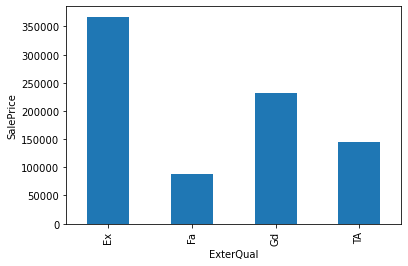

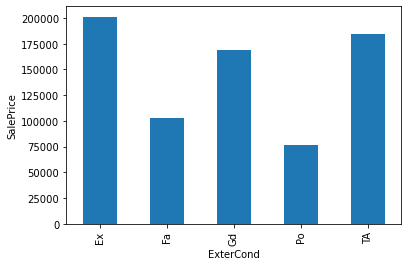

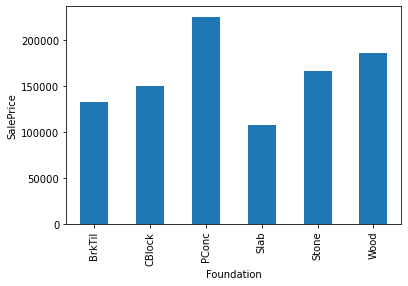

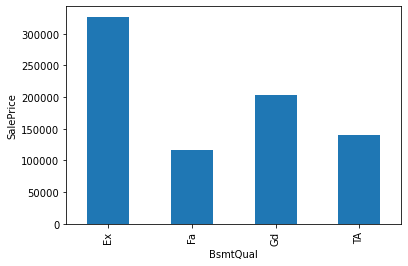

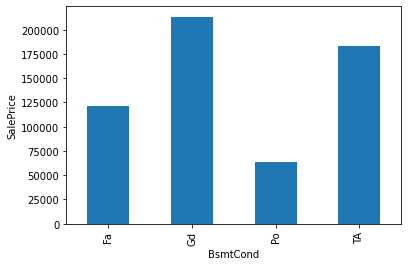

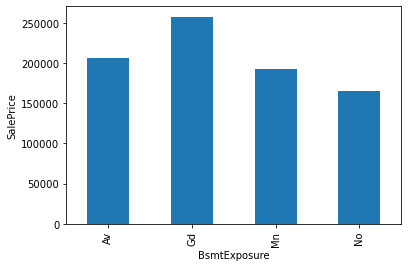

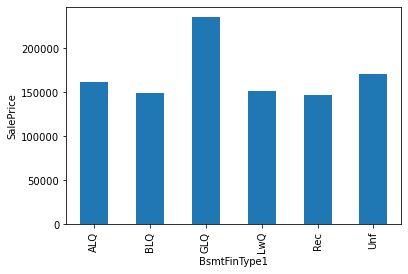

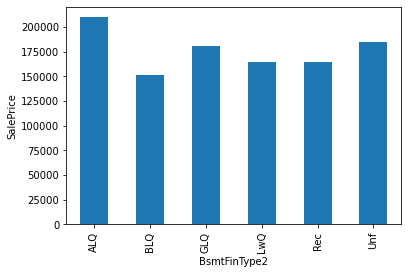

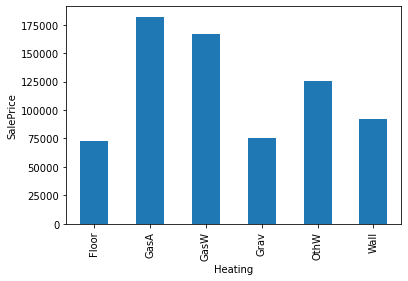

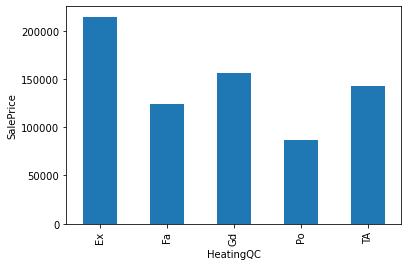

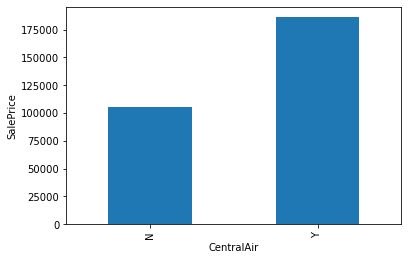

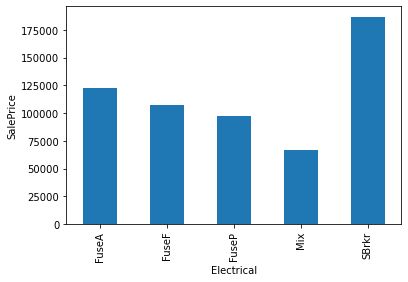

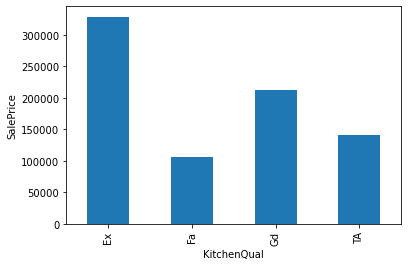

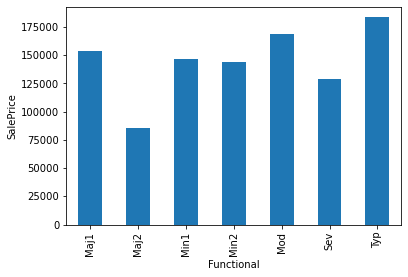

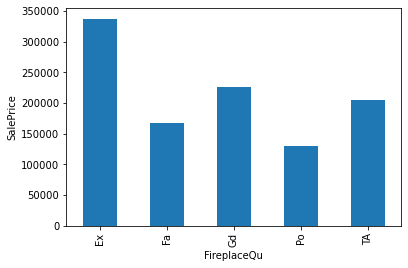

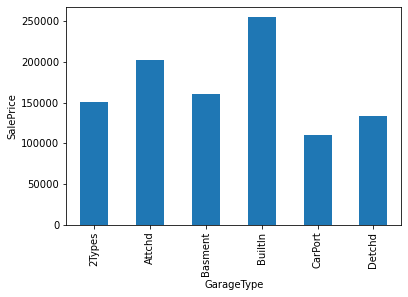

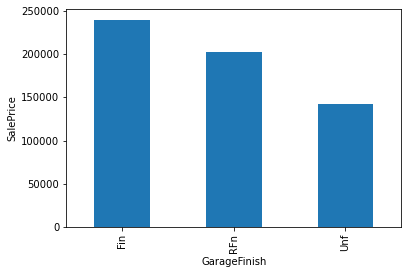

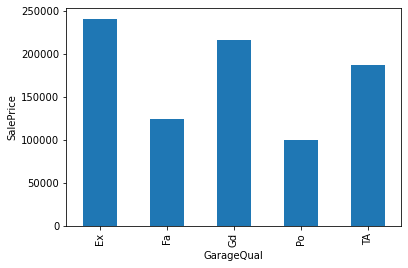

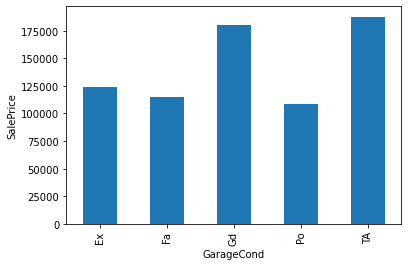

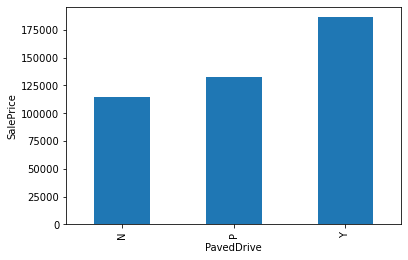

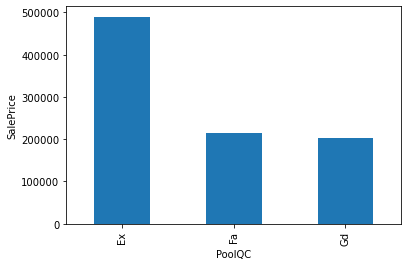

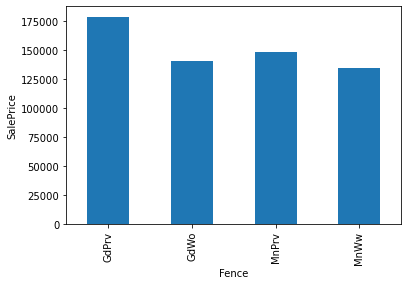

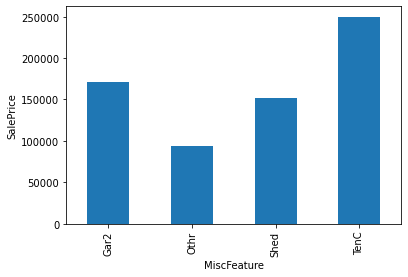

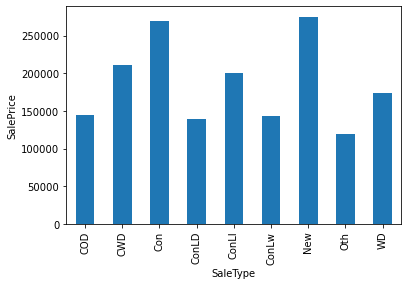

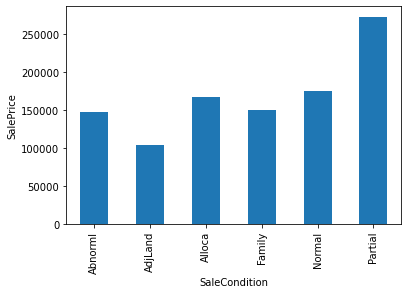

In [27]:
for feature in categorical_feature:
    df.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Log Normal transformation
4. Categorical variables: remove rare labels
5. Dimensionality reduction
6. Encoding Categorical variables

Before feature engineering we need to combine the training data and the test data inorder to perform feature engineering on the combined dataset

In [28]:
train_labels = df['SalePrice'].reset_index(drop=True)
train_features = df.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
df_ = pd.concat([train_features, test_features]).reset_index(drop=True)
df_.shape

(2919, 80)

In [29]:
df = df_.copy()
df.drop(["Id"], axis = 1, inplace = True)

In [30]:
df.shape

(2919, 79)

## 1. Missing Values

#### For Categorical Variables 

In [31]:
missing_categorical = [feature for feature in categorical_feature if df[feature].isnull().sum()>1]
missing_categorical

['MSZoning',
 'Alley',
 'Utilities',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [32]:
# displaying the percentage of missing values in each feature
missing = {}
for feature in missing_categorical:
    missing[feature] = np.round(df[feature].isnull().mean()*100, 4)
df_miss = sorted(missing.items(),key = lambda x : x[1], reverse=True)
df_miss

[('PoolQC', 99.6574),
 ('MiscFeature', 96.4029),
 ('Alley', 93.2169),
 ('Fence', 80.4385),
 ('FireplaceQu', 48.6468),
 ('GarageFinish', 5.4471),
 ('GarageQual', 5.4471),
 ('GarageCond', 5.4471),
 ('GarageType', 5.3786),
 ('BsmtCond', 2.8092),
 ('BsmtExposure', 2.8092),
 ('BsmtQual', 2.7749),
 ('BsmtFinType2', 2.7407),
 ('BsmtFinType1', 2.7064),
 ('MasVnrType', 0.8222),
 ('MSZoning', 0.137),
 ('Utilities', 0.0685),
 ('Functional', 0.0685)]

#### Visualising Missing values

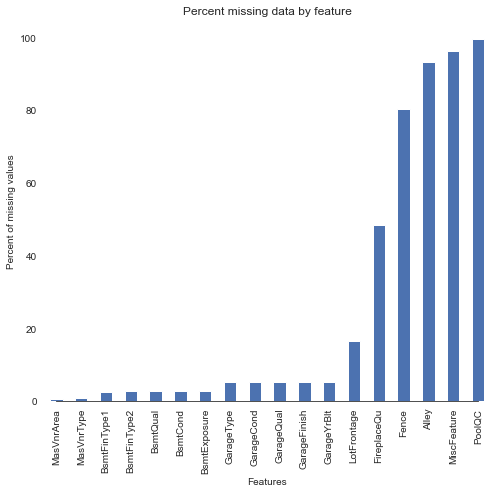

In [33]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(df.isnull().mean()*100,2)
missing = missing[missing > 0.5]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

Since we saw earlier that missing values play an important role in predicting the SalePrice, we cannot just drop the values. Although we can drop the values that have a lot of missing values like Alley, Miscfeature, Fence, PoolQC, etc

Since our dataset only has 1460 records, we can replace the missing values of each categorical variable with the mode of the missing value and that of the numerical variable with the mean/median. 
Mean should not be considered when there are outliers, hence we replace with median

In [34]:
# droping features with more than 70% missing values
drop_missing = [feature for feature in df.columns if df[feature].isnull().mean()*100 > 70]
drop_missing

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [35]:
df.drop(drop_missing, axis = 1, inplace = True)

In [36]:
for i in drop_missing:
    categorical_feature.remove(i)

In [37]:
df.shape

(2919, 75)

In [38]:
len(categorical_feature)

39

In [39]:
# filling the missing values with the mode of the feature
for feature in categorical_feature:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [40]:
df[categorical_feature].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

Now there are no missing values in the categorical features

#### For Numerical Variables 

In [41]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [42]:
missing_numerical = [feature for feature in numerical_features if df[feature].isnull().sum()>1]
missing_numerical

['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']

In [43]:
df.isnull().sum().count()

75

In [44]:
# filling missing values with median of the feature since there are outliers
for feature in missing_numerical:
    df[feature] = df[feature].fillna(df[feature].median())

In [45]:
df[missing_numerical].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

### 2. Temporal Variables

replacing the temporal variables with the difference in years from YrSold

In [46]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

In [47]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


### 3. Handling Skewed data with log normal transformation

Since many numerical features were skewed, we will perform log normal transformation on these variables

In [48]:
df[numerical_features].skew().sort_values(ascending=False)

MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.147456
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933616
MasVnrArea        2.614936
OpenPorchSF       2.536417
WoodDeckSF        1.843380
LotFrontage       1.675713
1stFlrSF          1.470360
BsmtFinSF1        1.425722
MSSubClass        1.376165
GrLivArea         1.270010
TotalBsmtSF       1.162882
BsmtUnfSF         0.919824
2ndFlrSF          0.862118
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
HalfBath          0.694924
BsmtFullBath      0.625153
YearBuilt         0.598917
OverallCond       0.570605
YearRemodAdd      0.450458
GarageYrBlt       0.393134
BedroomAbvGr      0.326492
GarageArea        0.241301
OverallQual       0.197212
MoSold            0.195985
FullBath          0.167692
YrSold            0.132467
GarageCars       -0.218373
dtype: float64

We will transform the features with skewness more than 1(positively skewed) or less than -1(negatively skewed). Since they are heavily skewed

In [49]:
heavy_skewed = [feature for feature in numerical_features if df[feature].skew() > 0.5 or df[feature].skew() < -0.5]
heavy_skewed

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [50]:
# We will only transform those features which do not contain a 0, since log(0) is infinity
for feature in heavy_skewed:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])

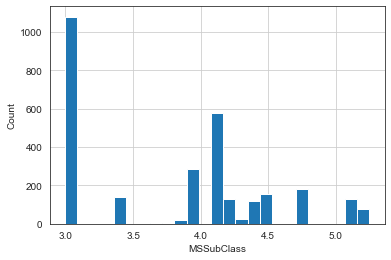

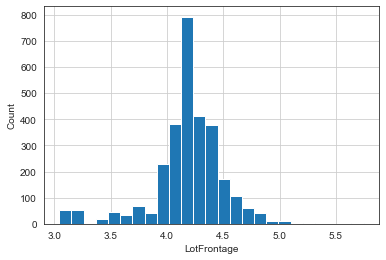

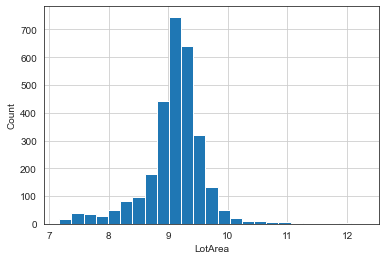

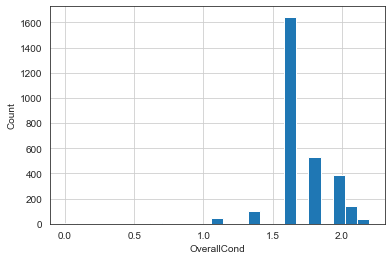

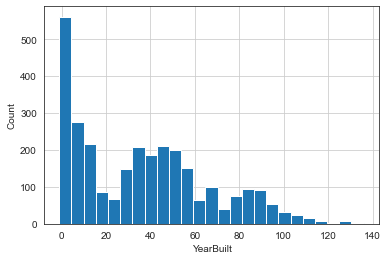

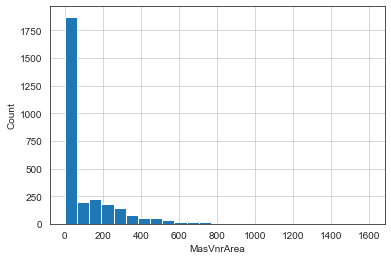

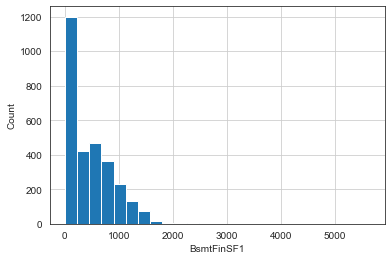

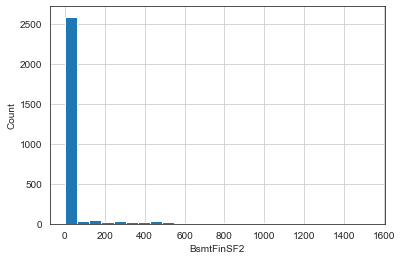

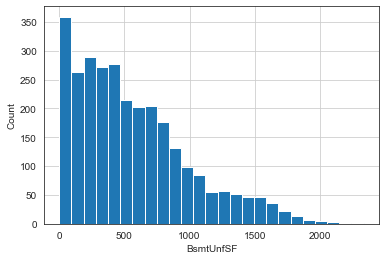

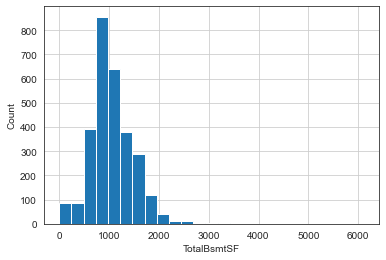

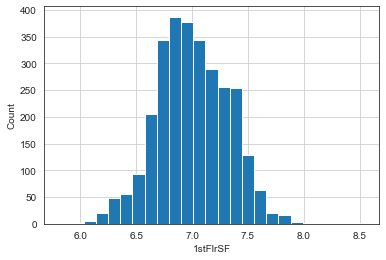

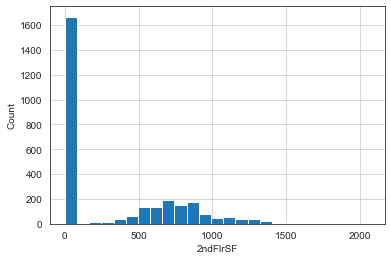

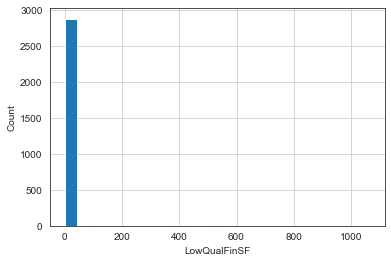

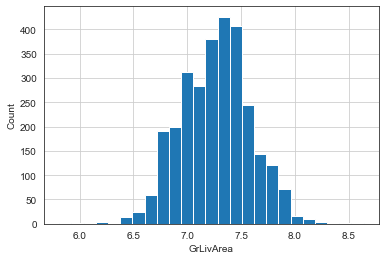

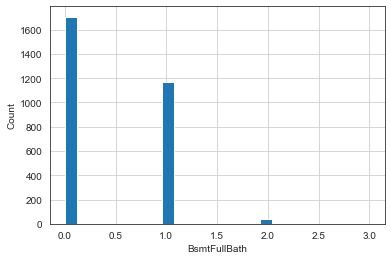

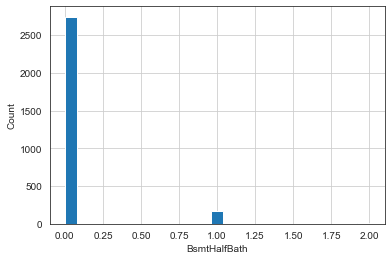

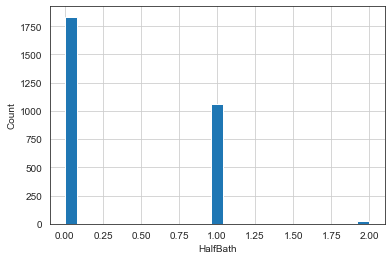

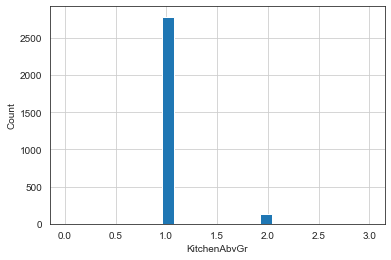

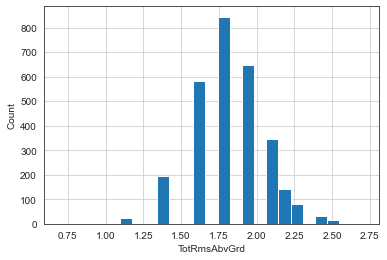

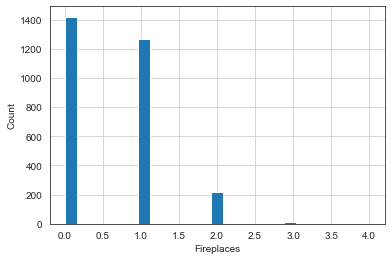

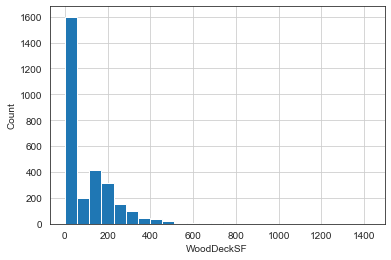

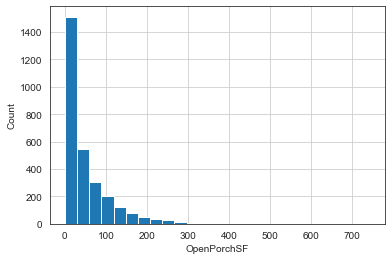

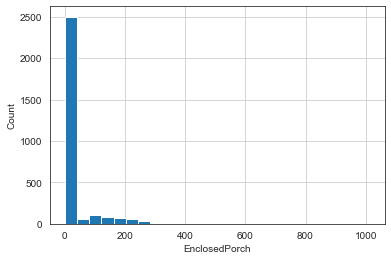

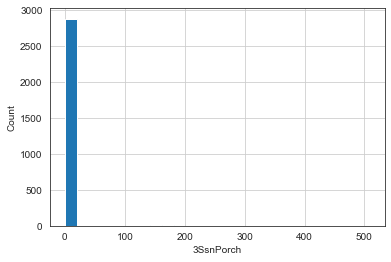

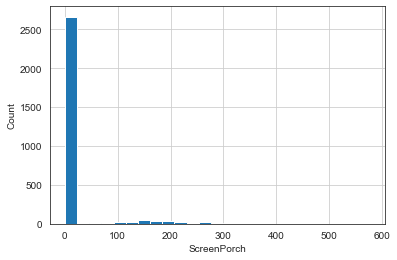

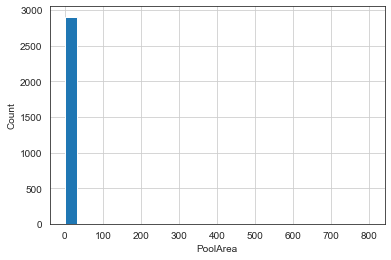

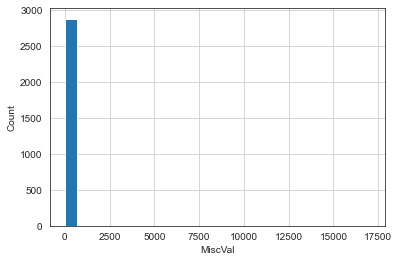

In [51]:
# plotting the ditribution of heavily skewed variable
for feature in heavy_skewed:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

In [52]:
df[heavy_skewed].head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.094345,4.174387,9.041922,1.609438,5,196.0,706.0,0.0,150.0,856.0,6.752270,854,0,7.444249,1.0,0.0,1,1,2.079442,0,0,61,0,0,0,0,0
1,2.995732,4.382027,9.169518,2.079442,31,0.0,978.0,0.0,284.0,1262.0,7.140453,0,0,7.140453,0.0,1.0,0,1,1.791759,1,298,0,0,0,0,0,0
2,4.094345,4.219508,9.328123,1.609438,7,162.0,486.0,0.0,434.0,920.0,6.824374,866,0,7.487734,1.0,0.0,1,1,1.791759,1,0,42,0,0,0,0,0
3,4.248495,4.094345,9.164296,1.609438,91,0.0,216.0,0.0,540.0,756.0,6.867974,756,0,7.448334,1.0,0.0,0,1,1.945910,1,0,35,272,0,0,0,0
4,4.094345,4.430817,9.565214,1.609438,8,350.0,655.0,0.0,490.0,1145.0,7.043160,1053,0,7.695303,1.0,0.0,1,1,2.197225,1,192,84,0,0,0,0,0


Now the numerical features are near-normally distributed

In [53]:
df.shape

(2919, 75)

## 5. Encoding Categorical variables

In [54]:
# creating categorical dataframe
df = pd.get_dummies(df).reset_index(drop=True)
df.shape

(2919, 275)

As we can see there are 275 cols in the df now

#### Removing duplicated column names

In [55]:
df = df.loc[:,~df.columns.duplicated()]

## 6. Scaling the numerical variable

In [56]:
ndf = df.copy()

In [57]:
numerical_features = [feature for feature in df_.columns if df_[feature].dtype !='O']
len(numerical_features)

37

In [58]:
numerical_features.remove("Id")

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ndf[numerical_features] = scaler.fit_transform(ndf[numerical_features])

In [60]:
ndf

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,

Now we have our original dataset where all the numerical features are scaled and all the categorical features are encoded

## 7. Dimensionality reduction

In [61]:
corr = ndf.corr()

In [62]:
ndf.corr().shape

(275, 275)

In [63]:
# removing the features with high correlation (more than 0.8) since these features will affect the dependant
# vairable in the same amount
# Since the correlation matrix is a mirror image about the diagonal, we take the upper triangle
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
# pd.DataFrame(upper_tri)

In [64]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.85) or any(upper_tri[column] <= -0.8)]
print(to_drop)

['GarageArea', 'MSZoning_RM', 'Street_Pave', 'LotShape_Reg', 'Utilities_NoSeWa', 'LandSlope_Mod', 'Neighborhood_Somerst', 'RoofStyle_Hip', 'Exterior2nd_AsbShng', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_None', 'ExterQual_TA', 'ExterCond_TA', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_TA', 'FireplaceQu_TA', 'GarageType_Detchd', 'GarageQual_TA', 'GarageCond_TA', 'PavedDrive_Y', 'SaleCondition_Partial']


In [65]:
# removing the above features from the df  
newdf = ndf.copy()
newdf.drop(to_drop, axis = 1, inplace = True)

In [66]:
newdf.shape

(2919, 249)

### Separating the datasets again back to test and train datasets

In [67]:
X_train = newdf.iloc[:len(train_labels), :]
X_test = newdf.iloc[len(train_labels):, :]
X_train.shape, train_labels.shape, X_test.shape

((1460, 249), (1460,), (1459, 249))

In [68]:
y_train = train_labels

# 3. Feature Selection

In [69]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [70]:
# Apply Feature Selection
# 1. Specify the Lasso Regression model, and select a suitable alpha (equivalent of penalty). The bigger the alpha
#    the less features that will be selected.
# 2. Use the selectFromModel object from sklearn, which will select the features where coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=1, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=1, random_state=0))

In [71]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [72]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 249
selected features: 237


In [73]:
print(selected_feat)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=237)


In [74]:
newdf.shape

(2919, 249)

In [75]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [76]:
X_train.shape

(1460, 237)

In [77]:
y_train.shape

(1460,)

In [78]:
missing_still = [feature for feature in X_test.columns if X_test[feature].isnull().sum()>=1]
missing_still

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars']

In [79]:
x = X_test
for feature in missing_still:
    x[feature].fillna(x[feature].median(), inplace = True)

In [80]:
x.isnull().sum().sum()

0

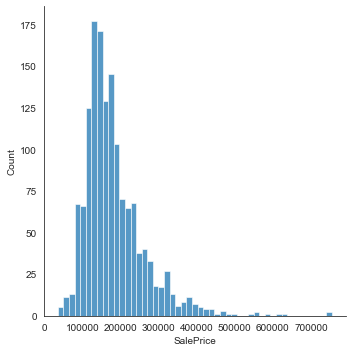

In [81]:
sns.displot(y_train)

In [82]:
y_train = np.log(y_train)

In [83]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# Model Building
In this section we will build and train the regression model for the training dataset

In [84]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [88]:
# Predicting the Test set results
predictions = regressor.predict(X_train)
y_pred = regressor.predict(x)

In [95]:
# Evaluation metrices
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_train, predictions)
MSE = metrics.mean_squared_error(y_train, predictions)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_train, predictions)
AdjR2 = 1-(1-R2)*(1197-1)/(1197-7-1)

print("Randome Forest Regressor")

print('MAE   = ', MAE)
print('MSE   = ', MSE)
print('RMSE  = ', RMSE)
print('R2    =', R2 )
print('AdjR2 =', AdjR2)

Randome Forest Regressor
MAE   =  0.06671360286669101
MSE   =  0.007070694472791327
RMSE  =  0.08408742160865278
R2    = 0.955656423074049
AdjR2 = 0.9553953591224243


In [86]:
y_pred

array([11.64396466, 11.95433978, 12.0913032 , ..., 11.99128582,
       11.69613601, 12.27290714])

## Submitting the file

In [90]:
submission = pd.read_csv("predictions.csv")
submission.shape

(1459, 2)

In [91]:
pred_label = np.expm1(y_pred)

In [92]:
pred_label

array([114000.24633634, 155489.47901334, 178313.33589169, ...,
       161341.67830346, 120105.72641637, 213822.70307175])

In [93]:
s = submission
s.iloc[:,1] = pred_label

In [94]:
# creating submission file
s.to_csv('predictions2.csv',index=False)